# Simple Linear Regression 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"C:\Users\harib\OneDrive\Documents\Python Scripts\Statistics\Regression\Simple linear Regression\income_data.csv")
df

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398
...,...,...,...
493,494,5.249209,4.568705
494,495,3.471799,2.535002
495,496,6.087610,4.397451
496,497,3.440847,2.070664


In [3]:
df.drop(df.columns[0], axis=1, inplace=True)
df

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398
...,...,...
493,5.249209,4.568705
494,3.471799,2.535002
495,6.087610,4.397451
496,3.440847,2.070664


## Finding Missing Value


In [4]:
msv = df.isnull() # return the data frame with True value for missing value and False for non-missing 
print(msv.sum()) # Count the Number of True or adds the all 1 boolean
nav = df.isna()
print("\nNot Available values or NA values: \n\n", nav.sum())

income       0
happiness    0
dtype: int64

Not Available values or NA values: 

 income       0
happiness    0
dtype: int64


## Outliers

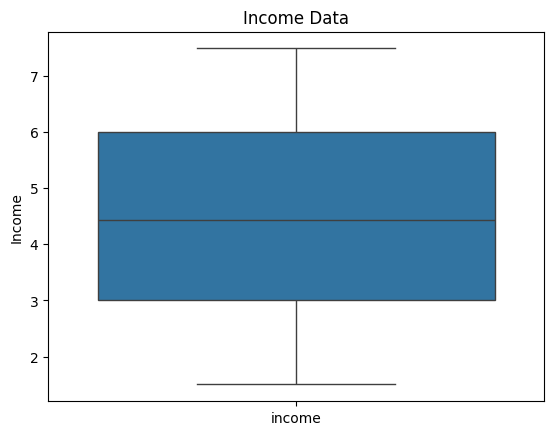

In [5]:
sns.boxplot(df.iloc[:,[0]])
plt.title("Income Data")
# plt.xlabel("Income")
plt.ylabel("Income")
plt.show()

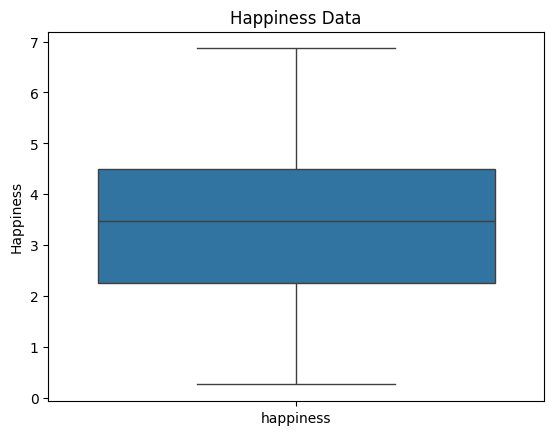

In [6]:
sns.boxplot(df.loc[:,["happiness"]])
plt.title("Happiness Data")

plt.ylabel("Happiness")
plt.show()

In [7]:
df.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


## Scatter Plot

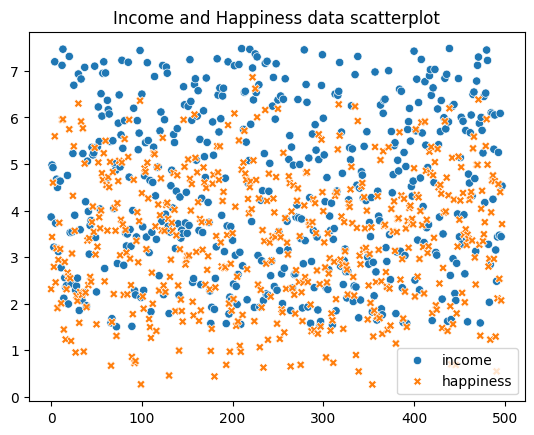

In [8]:
sns.scatterplot(df)
plt.title("Income and Happiness data scatterplot")
plt.show()


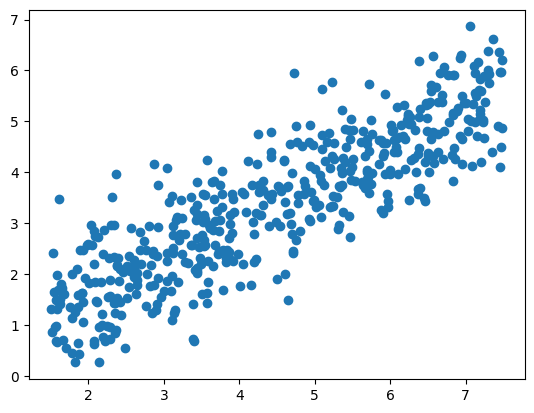

In [9]:
plt.scatter(df.loc[:,['income']], df.loc[:,['happiness']])


## Regression Plot

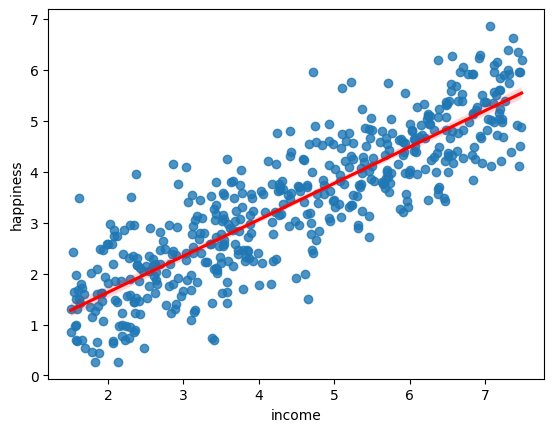

In [10]:
sns.regplot(x='income', y='happiness', data=df, line_kws={"color":'red'})
plt.show()

## Pearson's Correlation Coefficient 

In [11]:
income = df['income']
happiness = df['happiness']

r, p = sc.pearsonr(income, happiness)
print(f"pearson's r correlation coefficient is {r} indicates strong relationship\nAnd its p_value is {p}")

pearson's r correlation coefficient is 0.8656337299838435 indicates strong relationship
And its p_value is 3.956245289952218e-151


## Linear Regression

In [12]:

model = smf.ols('happiness ~ income', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1483.
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          3.96e-151
Time:                        10:16:08   Log-Likelihood:                -540.72
No. Observations:                 498   AIC:                             1085.
Df Residuals:                     496   BIC:                             1094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2043      0.089      2.299      0.022       0.030       0.379
income         0.7138      0.019     38.505      0.000       0.677       0.750
==============================================================================
Omnibus:                        1.396   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.349
Skew:                           0.127   Prob(JB):                        0.509
Kurtosis:                       2.995   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X = df[['income']]
y = df['happiness']

model = LinearRegression().fit(X, y)

print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Intercept: 0.20427039620417586
Coefficient: 0.7138255122802077


# Model

In [14]:
def happyFam(inc):
    inc = inc/10000
    happi = 0.20427039620417586 + 0.7138255122802077*inc + 0.019
    return happi

happyFam(55635.82)

4.194697167467119